<a href="https://colab.research.google.com/github/albim72/DL_11/blob/main/regresja_paliwo_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3,suppress = True)

In [2]:
import tensorflow as tf
from tensorflow.keras import layers

ZESTAW DANYCH AUTO MPG(STANFORD)

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model Year','Origin']

raw_dataset = pd.read_csv(url,names=column_names, na_values='?', comment='\t', sep = ' ',skipinitialspace=True)

In [4]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
dataset = dataset.dropna()

In [7]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
dataset['Origin'] = dataset['Origin'].map({1:'USA',2:'Europe',3:'Japan'})

<ipython-input-8-972d235bd86e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Origin'] = dataset['Origin'].map({1:'USA',2:'Europe',3:'Japan'})


In [9]:
dataset = pd.get_dummies(dataset,columns=['Origin'],prefix='',prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [10]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

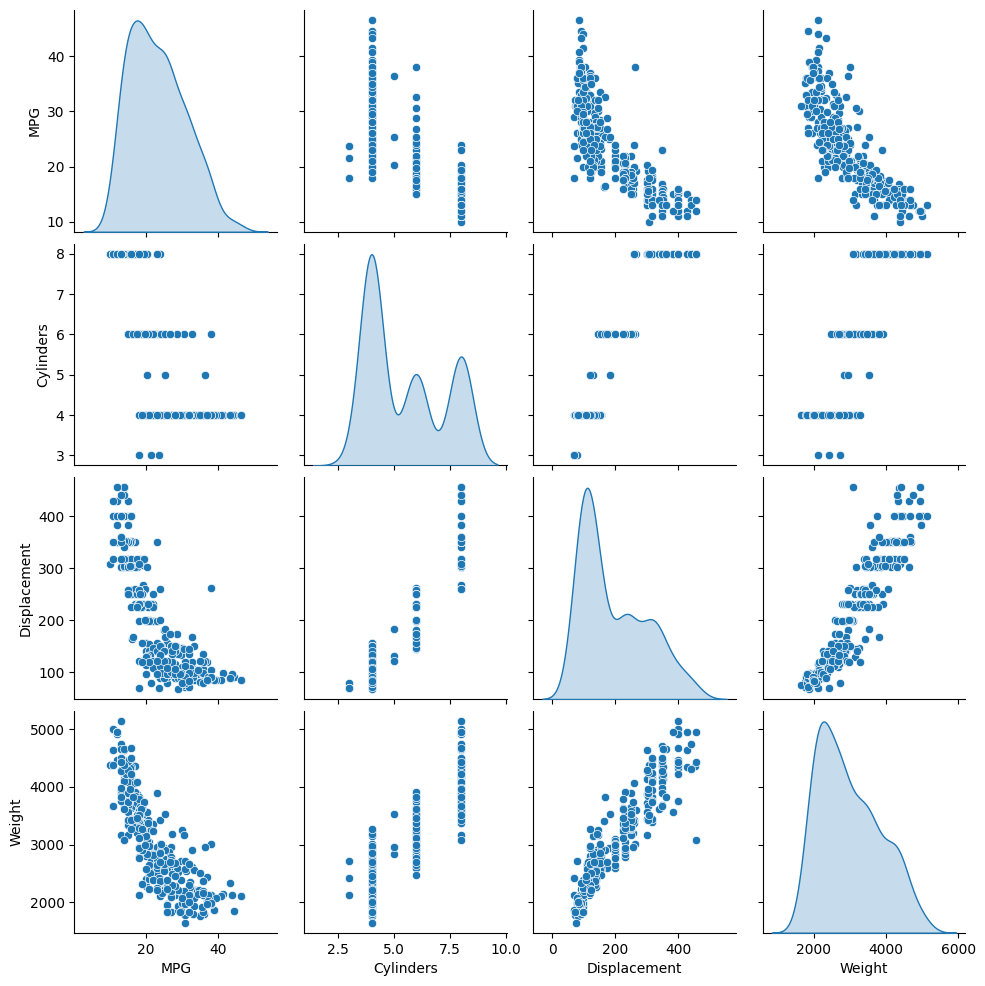

In [11]:
sns.pairplot(train_dataset[['MPG','Cylinders','Displacement','Weight']],diag_kind='kde')

In [12]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [13]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

NORMALIZACJA

In [14]:
train_dataset.describe().transpose()[['mean','std']]

,mean,std
MPG,23.310510,7.728652
Cylinders,5.477707,1.699788
Displacement,195.318471,104.331589
Horsepower,104.869427,38.096214
Weight,2990.251592,843.898596
Acceleration,15.559236,2.789230
Model Year,75.898089,3.675642
Europe,0.178344,0.383413
Japan,0.197452,0.398712
USA,0.624204,0.485101


In [15]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [16]:
normalizer.adapt(np.array(train_features))

In [17]:
print(normalizer.mean.numpy())

[[   5.478  195.318  104.869 2990.252   15.559   75.898    0.178    0.197
     0.624]]


In [18]:
first = np.array(train_features[:1])

with np.printoptions(precision=2,suppress=True):
  print(f'Przerwszy przypadek: {first}\n')
  print(f'Znormalizowany: {normalizer(first).numpy()}')

Przerwszy przypadek: [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Znormalizowany: [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


REGRESJA LINIOWA
regresja liniowa z jedą zmienną -> na podstawie mocy silnika przewidujemy spalanie
Dwa etapy regresji:
1. Normalizacja funkcji wejściowej 'Horsepower' za pomocą warstwy przetwarzania wstępnego
2. transformacja liniowa (y=mx+b) aby uzyskać 1 wynik przy użyciu warstwy liniowej

In [19]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,],axis=None)
horsepower_normalizer.adapt(horsepower)

In [20]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])
horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [21]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 161ms/step


array([[-1.234],
       [-0.697],
       [ 2.278],
       [-1.73 ],
       [-1.565],
       [-0.615],
       [-1.854],
       [-1.565],
       [-0.408],
       [-0.697]], dtype=float32)

In [22]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss = 'mean_absolute_error'
)

In [46]:
%%time
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 5.04 s, sys: 178 ms, total: 5.22 s
Wall time: 5.81 s


In [25]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.804284,4.198024,95
96,3.802613,4.175556,96
97,3.803920,4.191766,97
98,3.805790,4.202908,98
99,3.803525,4.163963,99


In [26]:
def plot_loss(history):
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['val_loss'],label='val_loss')
  plt.ylim([0,10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

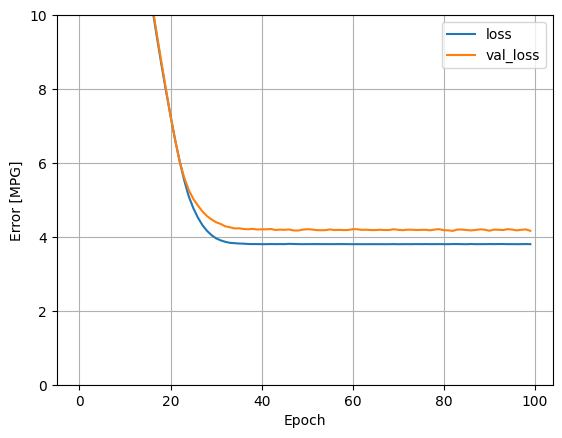

In [27]:
plot_loss(history)

In [30]:
test_results = {}
test_results['horsepower_model'] = horsepower_model.evaluate(
    test_features['Horsepower'],
    test_labels, verbose=0
)

In [31]:
x = tf.linspace(0.0,250,251)
y = horsepower_model.predict(x)

8/8 [==============================] - 0s 2ms/step


In [32]:
def plot_horsepower(x,y):
  plt.scatter(train_features['Horsepower'],train_labels,label='Data')
  plt.plot(x,y,color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()

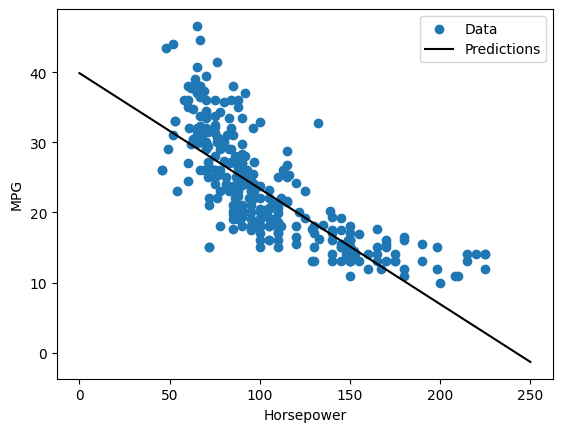

In [33]:
plot_horsepower(x,y)

REGRESJA LINIOWA Z WIELOMA DANYMI WEJŚCIOWYMI <br>
DLA TEGO PRZYPADKU y = mx+b
m -> macierz
b -> wektor

In [35]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [36]:
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 88ms/step


array([[ 0.499],
       [-0.241],
       [ 0.698],
       [-1.171],
       [-0.555],
       [ 0.18 ],
       [-0.315],
       [-0.839],
       [ 1.015],
       [ 1.131]], dtype=float32)

In [37]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[ 0.608],
       [-0.43 ],
       [ 0.187],
       [-0.27 ],
       [ 0.641],
       [-0.731],
       [-0.772],
       [-0.563],
       [-0.4  ]], dtype=float32)>

In [38]:
linear_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.1),
    loss = 'mean_absolute_error'
)

In [40]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 5.32 s, sys: 171 ms, total: 5.49 s
Wall time: 6.08 s


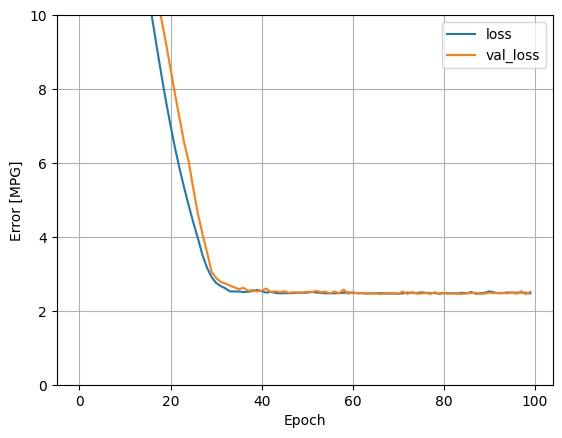

In [41]:
plot_loss(history)

In [42]:
test_results['linear_model'] = linear_model.evaluate(
    test_features,test_labels,verbose=0
)

MODEL REGRESJI DNN (Z SIECIĄ GŁĘBOKĄ) Z POJEDYNCZYM WEJŚCIEM

In [43]:
from keras.src.optimizers import optimizer
from keras.src.layers.attention.multi_head_attention import activation
def build_and_compile_model(norm):
  model = tf.keras.Sequential([
      norm,
      layers.Dense(64,activation='relu'),
      layers.Dense(64,activation='relu'),
      layers.Dense(1)
  ])
  model.compile(loss='mean_absolute_error',optimizer = tf.keras.optimizers.Adam(0.001))
  return model

In [44]:
dnn_horsepower_model = build_and_compile_model(horsepower_normalizer)

In [45]:
dnn_horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4356 (17.02 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [47]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 5.51 s, sys: 169 ms, total: 5.68 s
Wall time: 6.24 s


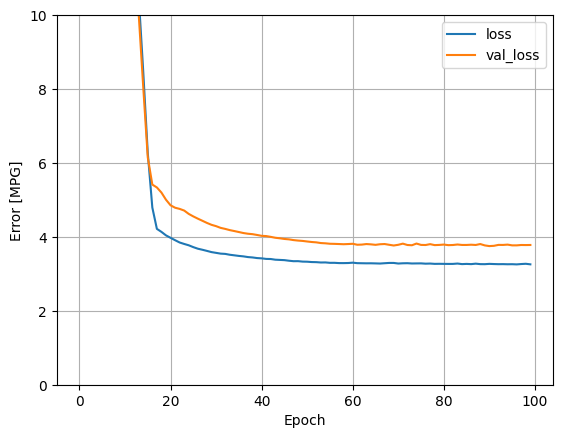

In [48]:
plot_loss(history)

In [49]:
x = tf.linspace(0.0,250,251)
y = dnn_horsepower_model.predict(x)

8/8 [==============================] - 0s 3ms/step


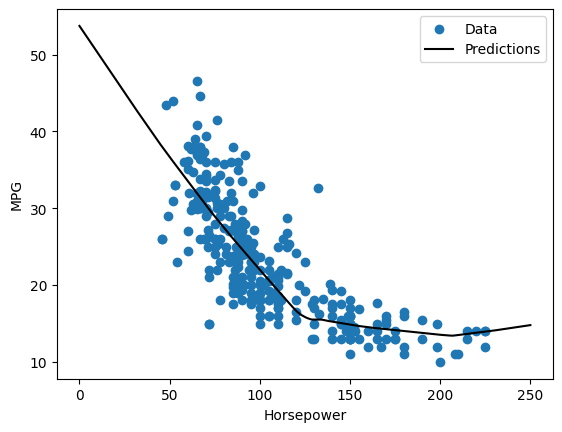

In [50]:
plot_horsepower(x,y)

In [51]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels, verbose=0
)

SIEĆ GŁĘBOKA DNN Z WIELOMA DANYMI WEJŚCIOWYMI

In [52]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 9)                 19        
 on)                                                             
                                                                 
 dense_5 (Dense)             (None, 64)                640       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4884 (19.08 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


In [53]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

CPU times: user 5.57 s, sys: 190 ms, total: 5.76 s
Wall time: 6.16 s


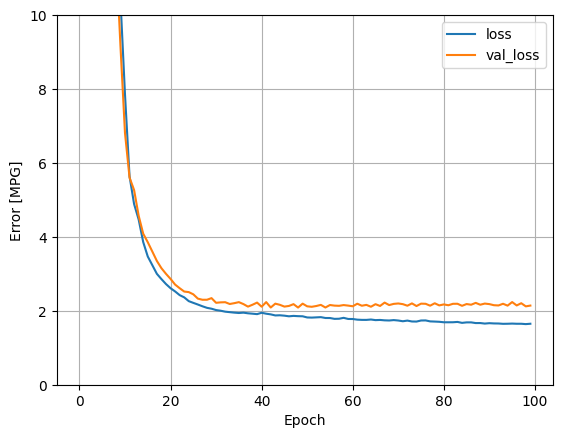

In [54]:
plot_loss(history)

In [55]:
test_results['dnn_model'] = dnn_model.evaluate(
    test_features, test_labels, verbose=0
)